In [9]:
import matplotlib.pyplot as plt
import numpy as np
import cv2
import os
import PIL
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

In [10]:
path_to_data = ".\\dataset"

In [11]:
# dataset directories
import os
img_dirs = []
for entry in os.scandir(path_to_data):
    if entry.is_dir():
        img_dirs.append(entry.path)

In [12]:
# printing 
img_dirs

['.\\dataset\\Ayman Sadiq',
 '.\\dataset\\Bangabandhu Sheikh Mujibur Rahman',
 '.\\dataset\\Humayun Ahmed',
 '.\\dataset\\Jamilur Reza Chowdhury',
 '.\\dataset\\Muhammad Zafar Iqbal',
 '.\\dataset\\Runa Laila',
 '.\\dataset\\Shahidul Alam',
 '.\\dataset\\Shakib Al Hasan',
 '.\\dataset\\Sheikh Hasina',
 '.\\dataset\\Wasfia Nazreen']

In [13]:
# build the dictonary twice in case of delteing something manually after cropping

celebrity_file_names_dict = {}
for img_dir in img_dirs:
    celebrity_name = img_dir.split('\\')[-1]
    file_list = []
    for entry in os.scandir(img_dir):
        file_list.append(entry.path)
    celebrity_file_names_dict[celebrity_name] = file_list

In [14]:
# class dict as y have to be number

class_dict = {}
count = 0
for celebrity_name in celebrity_file_names_dict.keys():
    class_dict[celebrity_name] = count
    count +=1
class_dict

{'Ayman Sadiq': 0,
 'Bangabandhu Sheikh Mujibur Rahman': 1,
 'Humayun Ahmed': 2,
 'Jamilur Reza Chowdhury': 3,
 'Muhammad Zafar Iqbal': 4,
 'Runa Laila': 5,
 'Shahidul Alam': 6,
 'Shakib Al Hasan': 7,
 'Sheikh Hasina': 8,
 'Wasfia Nazreen': 9}

In [15]:
celebrity_file_names_dict

{'Ayman Sadiq': ['.\\dataset\\Ayman Sadiq\\1.jpg',
  '.\\dataset\\Ayman Sadiq\\10.jpg',
  '.\\dataset\\Ayman Sadiq\\10_rotated_0_zoom_0.jpg',
  '.\\dataset\\Ayman Sadiq\\10_rotated_0_zoom_1.jpg',
  '.\\dataset\\Ayman Sadiq\\10_rotated_0_zoom_2.jpg',
  '.\\dataset\\Ayman Sadiq\\10_rotated_0_zoom_3.jpg',
  '.\\dataset\\Ayman Sadiq\\10_rotated_1_zoom_0.jpg',
  '.\\dataset\\Ayman Sadiq\\10_rotated_1_zoom_1.jpg',
  '.\\dataset\\Ayman Sadiq\\10_rotated_1_zoom_2.jpg',
  '.\\dataset\\Ayman Sadiq\\10_rotated_1_zoom_3.jpg',
  '.\\dataset\\Ayman Sadiq\\10_rotated_2_zoom_0.jpg',
  '.\\dataset\\Ayman Sadiq\\10_rotated_2_zoom_1.jpg',
  '.\\dataset\\Ayman Sadiq\\10_rotated_2_zoom_2.jpg',
  '.\\dataset\\Ayman Sadiq\\10_rotated_2_zoom_3.jpg',
  '.\\dataset\\Ayman Sadiq\\10_rotated_3_zoom_0.jpg',
  '.\\dataset\\Ayman Sadiq\\10_rotated_3_zoom_1.jpg',
  '.\\dataset\\Ayman Sadiq\\10_rotated_3_zoom_2.jpg',
  '.\\dataset\\Ayman Sadiq\\10_rotated_3_zoom_3.jpg',
  '.\\dataset\\Ayman Sadiq\\11.jpg',
  '.\\datas

In [18]:
X = []
y = []

for celebrity_name, training_files in celebrity_file_names_dict.items():
    for training_image in training_files:
        img = cv2.imread(training_image)
        if img is not None:
            scalled_raw_img = cv2.resize(img,(180,180))
            X.append(scalled_raw_img)
            y.append(class_dict[celebrity_name])

In [19]:
X = np.array(X)
y = np.array(y)

In [20]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [21]:
X_train_scaled = X_train / 255
X_test_scaled = X_test / 255

In [22]:
num_classes = 10

model = Sequential([
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])

model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
              
model.fit(X_train_scaled, y_train, epochs=30)

Epoch 1/30
132/132 [==============================] - 79s 578ms/step - loss: 1.8247 - accuracy: 0.3576
Epoch 2/30
132/132 [==============================] - 72s 548ms/step - loss: 0.9834 - accuracy: 0.6695
Epoch 3/30
132/132 [==============================] - 74s 560ms/step - loss: 0.4049 - accuracy: 0.8700
Epoch 4/30
132/132 [==============================] - 74s 563ms/step - loss: 0.2389 - accuracy: 0.9276
Epoch 5/30
132/132 [==============================] - 69s 522ms/step - loss: 0.0905 - accuracy: 0.9690
Epoch 6/30
132/132 [==============================] - 64s 484ms/step - loss: 0.0663 - accuracy: 0.9831
Epoch 7/30
132/132 [==============================] - 64s 488ms/step - loss: 0.0158 - accuracy: 0.9964
Epoch 8/30
132/132 [==============================] - 63s 480ms/step - loss: 0.0053 - accuracy: 0.9998
Epoch 9/30
132/132 [==============================] - 78s 589ms/step - loss: 0.0017 - accuracy: 1.0000
Epoch 10/30
132/132 [==============================] - 81s 612ms/step - l

In [23]:
model.evaluate(X_test_scaled,y_test)

44/44 [==============================] - 5s 101ms/step - loss: 0.2646 - accuracy: 0.9350


[0.26462727785110474, 0.935046374797821]

In [24]:
predictions = model.predict(X_test_scaled)
predictions

44/44 [==============================] - 5s 114ms/step


array([[  7.63946   ,  20.510056  ,   3.0622776 , ..., -26.879068  ,
         -0.8096796 ,  13.835554  ],
       [  8.33012   , -30.089788  ,  21.074894  , ...,  -7.4489284 ,
         -8.347385  , -13.215843  ],
       [ -5.21081   ,   0.36280394,  -5.475749  , ...,   7.8214917 ,
          4.7993245 ,   2.3449006 ],
       ...,
       [  6.032649  ,   4.632524  ,   3.8940961 , ..., -16.486551  ,
          7.0292454 ,   4.280437  ],
       [  3.0237675 ,  -8.957423  ,  -2.8397586 , ...,   0.25060517,
         10.071451  ,  -2.7745898 ],
       [ -7.5406785 ,   2.4052515 ,   5.238332  , ..., -23.652866  ,
         20.55699   ,  -3.6252353 ]], dtype=float32)

In [25]:
score = tf.nn.softmax(predictions[0])

In [26]:
np.argmax(score)

1

In [27]:
y_test[0]

1

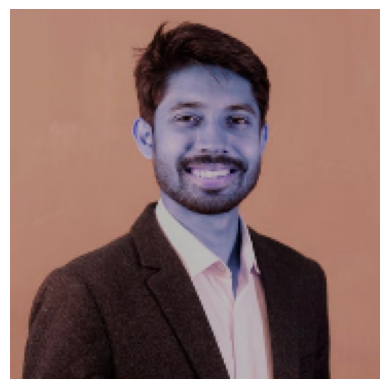

In [29]:
plt.axis('off')
plt.imshow(X[0])

In [31]:
model.evaluate(X_test_scaled,y_test)

44/44 [==============================] - 4s 84ms/step - loss: 0.2646 - accuracy: 0.9350


[0.26462727785110474, 0.935046374797821]

In [35]:
# import the class dictonray as json file
import json
with open("class_dictionary.json","w") as f:
    f.write(json.dumps(class_dict))

In [36]:
model.save('')

INFO:tensorflow:Assets written to: assets


INFO:tensorflow:Assets written to: assets
